Evaluate whether older planes suffer more delays on a year-to-year basis

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the cleaned dataset
df = pd.read_csv("cleaned_dataset_2006_2007.csv")
df.shape

(14268895, 29)

In [3]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TotalDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,45,13,0,0,0,0,0,0,0,4.0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,27,19,0,0,0,0,0,0,0,-5.0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,4,11,0,0,0,0,0,0,0,-23.0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,16,10,0,0,0,0,0,0,0,-10.0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,27,12,0,0,0,0,0,0,0,-8.0


In [4]:
#Importing plane data
plane_data = pd.read_csv(r"C:\Users\jaime\Desktop\excel for programming\plane-data.csv")

In [5]:
plane_data.head()

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N050AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N051AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N052AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N054AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N055AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
plane_data.shape

(5029, 9)

In [8]:
plane_data.isnull().sum()

tailnum            0
type             549
manufacturer     549
issue_date       549
model            549
status           549
aircraft_type    549
engine_type      549
year             549
dtype: int64

In [6]:
#Extracting only the necessary columns
plane_data_filtered = plane_data.filter(['tailnum','year'])

In [7]:
#Renaming Columns extracted from thr plane data
plane_data_filtered.rename(columns={"tailnum":"TailNum", "year":"YearOfManufacture"}, inplace = True)
print(plane_data_filtered)

     TailNum YearOfManufacture
0     N050AA               NaN
1     N051AA               NaN
2     N052AA               NaN
3     N054AA               NaN
4     N055AA               NaN
...      ...               ...
5024  N997DL              1992
5025  N998AT              2002
5026  N998DL              1992
5027  N999CA              1998
5028  N999DN              1992

[5029 rows x 2 columns]


In [8]:
#Extracting only the necessary columns from df
df_filtered = df.filter(['TailNum','TotalDelay'])
print(df_filtered)

         TailNum  TotalDelay
0         N657AW         4.0
1         N834AW        -5.0
2         N605AW       -23.0
3         N312AW       -10.0
4         N309AW        -8.0
...          ...         ...
14268890  N670DN         6.0
14268891  N829MH        16.0
14268892  N623DL        14.0
14268893  N970DL        74.0
14268894  N628DL        57.0

[14268895 rows x 2 columns]


In [9]:
#Inner Merging df_filtered and plane_data_filtered based on TailNum 
plane_df_merged = pd.merge(df_filtered,plane_data_filtered, on=['TailNum'])

In [10]:
plane_df_merged.head()

,TailNum,TotalDelay,YearOfManufacture
0,N657AW,4.0,1999
1,N657AW,-4.0,1999
2,N657AW,-14.0,1999
3,N657AW,-7.0,1999
4,N657AW,3.0,1999


In [11]:
plane_df_merged.shape

(12611572, 3)

In [12]:
#Checking for null values
plane_df_merged.isnull().sum()

TailNum                   0
TotalDelay                0
YearOfManufacture    692306
dtype: int64

In [13]:
#Removing the rows with null values
plane_df_merged = plane_df_merged.dropna()

In [14]:
plane_df_merged.dtypes

TailNum               object
TotalDelay           float64
YearOfManufacture     object
dtype: object

In [15]:
plane_df_merged['YearOfManufacture'].value_counts()

2001    1103472
2002     888034
2000     873247
2003     841624
1999     838572
2004     734459
1998     676449
2005     592714
1988     386627
1996     386483
1991     368744
1997     356413
None     350739
1992     339039
1990     338603
1987     334012
2006     320450
1994     313851
1995     307626
1989     290508
1985     255947
1993     254985
1986     229833
2007      89002
1984      66833
1968      65127
1983      43174
1967      36474
1969      34318
1979      29235
1978      25531
1975      24800
1976      24755
1980      20535
1977      13620
1982      10946
0         10422
1973       7901
1970       5812
1959       5008
1966       3205
1963       3171
1974       3148
1962       2814
1964       2792
1971       2783
1965       2550
1957       1792
1956        556
1972        531
Name: YearOfManufacture, dtype: int64

In [16]:
#Removing the rows with year of manufacture as 0 and None
plane_df_merged.drop(plane_df_merged[(plane_df_merged['YearOfManufacture'] == '0') | (plane_df_merged['YearOfManufacture'] == 'None') ].index, inplace = True)
plane_df_merged.shape

(11558105, 3)

In [17]:
#Changing the data type as integer for the Year of manufacture column
plane_df_merged['YearOfManufacture'] = plane_df_merged['YearOfManufacture'].astype(int)

In [18]:
plane_df_merged.dtypes

TailNum               object
TotalDelay           float64
YearOfManufacture      int32
dtype: object

In [19]:
plane_df_merged['AverageTotalDelay'] = plane_df_merged.groupby('YearOfManufacture')['TotalDelay'].transform('mean')

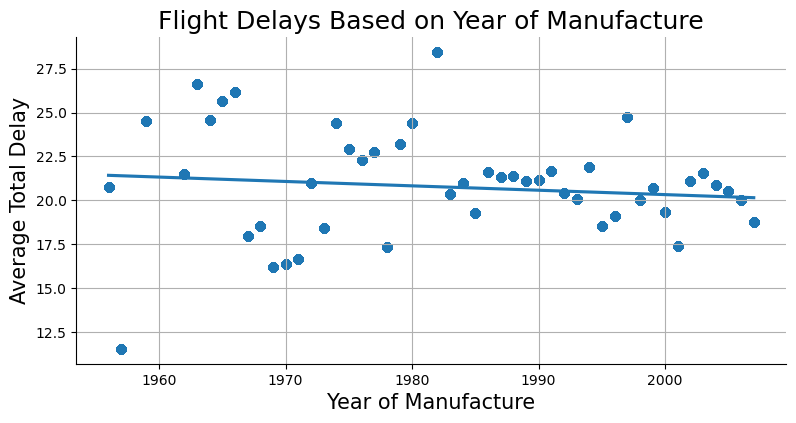

In [20]:
#plotting a scatter plots with a overlaid regression line
sns.lmplot(x='YearOfManufacture', y="AverageTotalDelay", data=plane_df_merged,
          aspect = 2, height= 4, palette = "mediumorchid")
plt.title("Flight Delays Based on Year of Manufacture", size=18)
plt.xlabel("Year of Manufacture", fontsize=15)
plt.ylabel("Average Total Delay", fontsize=15)
plt.grid()
plt.show
plt.savefig('Part 2 (b).png')
